In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
with open("C:/Users/ASUS/Downloads/cov_glue.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')
table1 = soup.find('table', id='mutTable')

In [4]:
table=[]
for i in table1.find_all('tr'):
    line = []
    for j in i.find_all('td'):
        line.append(j.text)
    table.append(line)

In [5]:
headers = table[0]
mut_table = table[1:]

In [6]:
df = pd.DataFrame(mut_table, columns = headers)

In [7]:
df.to_csv("D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data/cov_glue_mut.csv")

In [8]:
df['AA_from'] = df['Mutation'].astype(str).str[0]
df['AA_to'] = df['Mutation'].astype(str).str[-1]

In [9]:
from_nuc=[]
for codon in df['RefCodon']:
    uppernuc=''
    for nuc in codon:
        if nuc.isupper():
            uppernuc+=nuc
    from_nuc.append(uppernuc)
    
to_nuc=[]
for codon in df['MutCodon']:
    uppernuc=''
    for nuc in codon:
        if nuc.isupper():
            uppernuc+=nuc
    to_nuc.append(uppernuc)

In [10]:
df['from_nuc'] = from_nuc
df['to_nuc'] = to_nuc

In [11]:
df['mut_status'] = 0

In [12]:
df.loc[((df['from_nuc'] == 'C') | (df['from_nuc'] == 'G')) & (df['to_nuc'] =='T'),'mut_status'] = 1
df.loc[((df['to_nuc'] == 'C') | (df['to_nuc'] == 'G')) & (df['from_nuc'] =='T'),'mut_status'] = -1

In [13]:
df["Proportion"] = pd.to_numeric(df["Proportion"])

In [14]:
df['prop_category'] = ''

In [15]:
df.loc[(df['Proportion'] >= 0.0001) & (df['Proportion'] < 0.001),'prop_category'] = '[0.0001;0.001)'
df.loc[(df['Proportion'] >= 0.001) & (df['Proportion'] < 0.01),'prop_category'] = '[0.001;0.01)'
df.loc[(df['Proportion'] >= 0.01) & (df['Proportion'] < 0.1),'prop_category'] = '[0.01;0.1)'
df.loc[(df['Proportion'] >= 0.1),'prop_category'] = '>=0.1'
df.loc[(df['Proportion'] < 0.0001),'prop_category'] = '<0.0001'

In [16]:
df

,Lineage,ORF,CodonNum,Mutation,ORF1ab,MutType,C1,C2,C3,RefCodon,MutCodon,Count,Proportion,AA_from,AA_to,from_nuc,to_nuc,mut_status,prop_category
0,All,S,614,D614G,,nonsyn,23402,23403,23404,gAt,gGt,5182511,0.991216,D,G,A,G,0,>=0.1
1,All,ORF1ab/nsp12,323,P323L,P4715L,nonsyn,14407,14408,14409,cCt,cTt,5144375,0.983923,P,L,C,T,1,>=0.1
2,All,S,452,L452R,,nonsyn,22916,22917,22918,cTg,cGg,2772069,0.530191,L,R,T,G,-1,>=0.1
3,All,M,82,I82T,,nonsyn,26766,26767,26768,aTc,aCc,2769241,0.529650,I,T,T,C,-1,>=0.1
4,All,S,681,P681R,,nonsyn,23603,23604,23605,cCt,cGt,2762560,0.528372,P,R,C,G,0,>=0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,All,ORF1ab/nsp6,129,R129K,R3698K,nonsyn,11357,11358,11359,aGa,aAa,526,0.000101,R,K,G,A,0,[0.0001;0.001)
5348,All,ORF1ab/nsp12,847,I847V,I5239V,nonsyn,15979,15980,15981,Atc,Gtc,528,0.000101,I,V,A,G,0,[0.0001;0.001)
5349,All,ORF1ab/nsp12,928,H928Y,H5320Y,nonsyn,16222,16223,16224,Cat,Tat,528,0.000101,H,Y,C,T,1,[0.0001;0.001)
5350,All,ORF1ab/nsp14A2-B,474,I474V,I6399V,nonsyn,19459,19460,19461,Ata,Gta,529,0.000101,I,V,A,G,0,[0.0001;0.001)


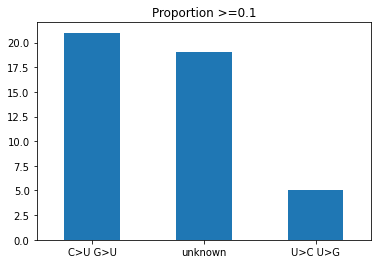

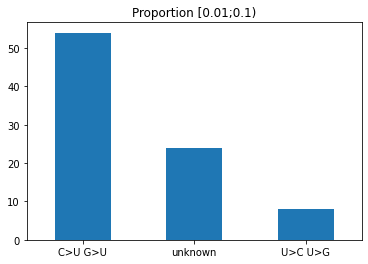

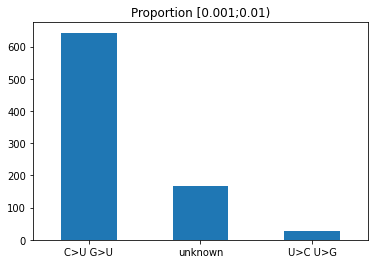

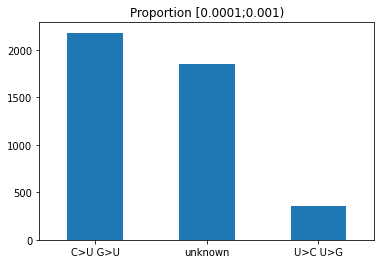

In [17]:
df.loc[df['mut_status']==0,'mut_status_char']="unknown"
df.loc[df['mut_status']==1,'mut_status_char']="C>U G>U"
df.loc[df['mut_status']==-1,'mut_status_char']="U>C U>G"
for categor in df['prop_category'].unique():
    df[df['prop_category'] == categor]['mut_status_char'].value_counts().plot(kind='bar', rot=0)
    plt.title('Proportion '+categor)
    plt.show()
    plt.close()

In [18]:
df['mut_status_char'].value_counts()

C>U G>U    2897
unknown    2065
U>C U>G     390
Name: mut_status_char, dtype: int64

Всего C>U G>U мутаций 2897. В обратную сторону 390. Остальное - другие мутации (2065). Если разделять по Proportion, видно, что всего C>U G>U выше чем в обратную сторону.

Далее логистическая регрессия, за x берем Proportion, за y - статус мутации (1 - C>U/G>U, -1 - U>G/U>C, 0 - прочее)

In [19]:
x = df['Proportion']
y = df['mut_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12345)
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [20]:
model = LogisticRegression(random_state=12345).fit(x_train, y_train)

In [21]:
y_predict = model.predict(x_test)

In [27]:
x_train

array([[0.000352],
       [0.000118],
       [0.000394],
       ...,
       [0.000361],
       [0.000181],
       [0.000127]])

In [29]:
y_train.value_counts()

 1    2177
 0    1546
-1     291
Name: mut_status, dtype: int64

In [23]:
errors = 0
for answer_num in range(len(y_predict)):
    if y_test.values[answer_num] != y_predict[answer_num]:
        errors+=1

In [24]:
print('Число ошибок - ', errors, " Процент ошибок -", errors/len(y_predict)*100,'%')

Число ошибок -  618  Процент ошибок - 46.18834080717489 %


In [25]:
unique, counts = np.unique(y_predict, return_counts=True)

In [26]:
print(np.asarray((unique, counts)).T)

[[   1 1338]]


Модель предсказала одни еденицы

Вывод - с помощью Proportion нельзя предсказать будет ли мутация по мутспеку или против, она от этого не зависит.